In [ ]:
import cv2 

img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\Martin\\sitriesgo')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Martin\sitriesgo\
C:\Users\Martin\sitriesgo\asaltos 1
C:\Users\Martin\sitriesgo\incendios 1624
C:\Users\Martin\sitriesgo\inundaciones 2181
C:\Users\Martin\sitriesgo\robos 1904
C:\Users\Martin\sitriesgo\tornados 3773
Directorios leidos: 5
Imagenes en cada directorio [1625, 2181, 1904, 3773, 2701]
suma Total de imagenes en subdirs: 12184


/home/likcos/DataSets/sportimages/sportimages/natacion 9348


/home/likcos/DataSets/sportimages/sportimages/futbol 5172


/home/likcos/DataSets/sportimages/sportimages/beisball 7617


/home/likcos/DataSets/sportimages/sportimages/f1 7752


/home/likcos/DataSets/sportimages/sportimages/ciclismo 5053


/home/likcos/DataSets/sportimages/sportimages/golf 7533
/home/likcos/DataSets/sportimages/sportimages/boxeo 9768
/home/likcos/DataSets/sportimages/sportimages/tenis 7125
/home/likcos/DataSets/sportimages/sportimages/basket 8937
Directorios leidos: 10
Imagenes en cada directorio [9349, 5172, 7617, 7752, 5053, 7533, 9768, 7125, 8937, 8822]
suma Total de imagenes en subdirs: 77128


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  12184


In [6]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 asaltos
1 incendios
2 inundaciones
3 robos
4 tornados


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (9747, 21, 28, 3) (9747,)
Testing data shape :  (2437, 21, 28, 3) (2437,)


Text(0.5, 1.0, 'Ground Truth : 3')

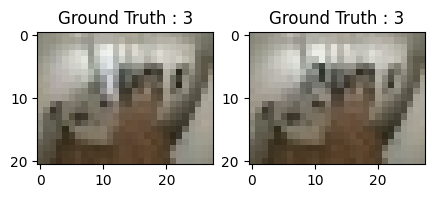

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

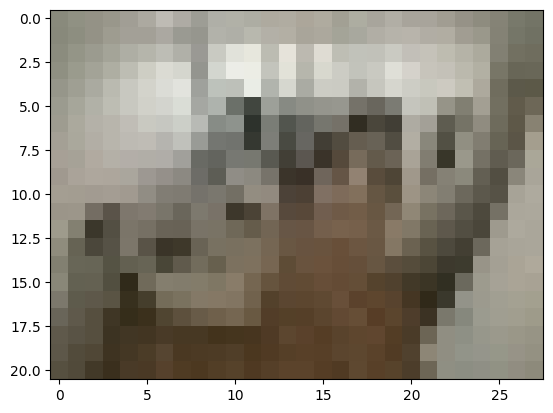

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(7797, 21, 28, 3) (1950, 21, 28, 3) (7797, 5) (1950, 5)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
input_shape = (21, 28, 3)
sport_model = Sequential()
sport_model.add(Input(shape=input_shape))
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(negative_slope=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(negative_slope=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [16]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 21, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 21, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4928)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         157,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,789 (620.27 KB)

 Trainable params: 158,789 (620.27 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.optimizers import SGD

# Define el optimizador SGD
sgd_optimizer = SGD(learning_rate=INIT_LR, decay=INIT_LR / 100)

# Compila el modelo utilizando el optimizador SGD definido
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd_optimizer, metrics=['accuracy'])
#sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

C:\Users\Martin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.2442 - loss: 1.6469 - val_accuracy: 0.4390 - val_loss: 1.5389
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3114 - loss: 1.5617 - val_accuracy: 0.4579 - val_loss: 1.4783
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3558 - loss: 1.5023 - val_accuracy: 0.5318 - val_loss: 1.4114
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3780 - loss: 1.4560 - val_accuracy: 0.5790 - val_loss: 1.3332
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4201 - loss: 1.3964 - val_accuracy: 0.6226 - val_loss: 1.2564
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4418 - loss: 1.3519 - val_accuracy: 0.6744 - val_loss: 1.1818
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4907 - loss: 1.2754 - val_accuracy: 0.7508 - val_loss: 1.1162
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5208 - loss: 1.2385 - val_accu

In [19]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:\\Users\\Martin\\setDocto\\riesgos.h5")

# Evaluamos la red

In [20]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9096 - loss: 0.5107


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5200949907302856
Test accuracy: 0.9060320258140564


In [22]:
sport_train.history

{'accuracy': [0.2662562429904938,
  0.3251250386238098,
  0.3574451804161072,
  0.39027830958366394,
  0.4261895716190338,
  0.4532512426376343,
  0.4945491850376129,
  0.5330255031585693,
  0.5688084959983826,
  0.6062588095664978,
  0.6304988861083984,
  0.6553802490234375,
  0.6721816062927246,
  0.6862896084785461,
  0.7109144330024719,
  0.7184814810752869,
  0.7281005382537842,
  0.7441323399543762,
  0.7546492218971252,
  0.7715787887573242],
 'loss': [1.6133313179016113,
  1.5484538078308105,
  1.4953969717025757,
  1.4396334886550903,
  1.384877324104309,
  1.3320342302322388,
  1.2746831178665161,
  1.216719388961792,
  1.1591112613677979,
  1.1058542728424072,
  1.0552140474319458,
  1.012556552886963,
  0.9667016267776489,
  0.9296627044677734,
  0.8795381784439087,
  0.8486796617507935,
  0.8146994113922119,
  0.7804355025291443,
  0.7559397220611572,
  0.7228871583938599],
 'val_accuracy': [0.4389743506908417,
  0.4579487144947052,
  0.5317948460578918,
  0.57897436618804

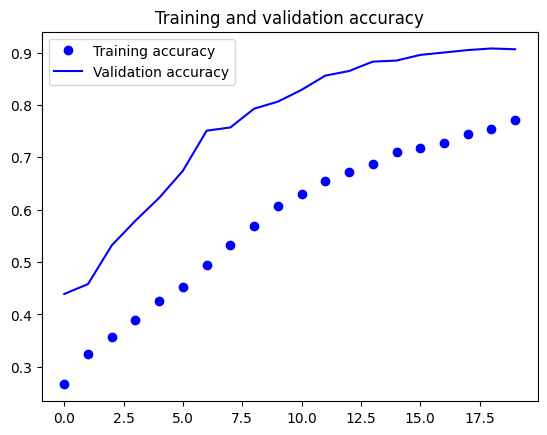

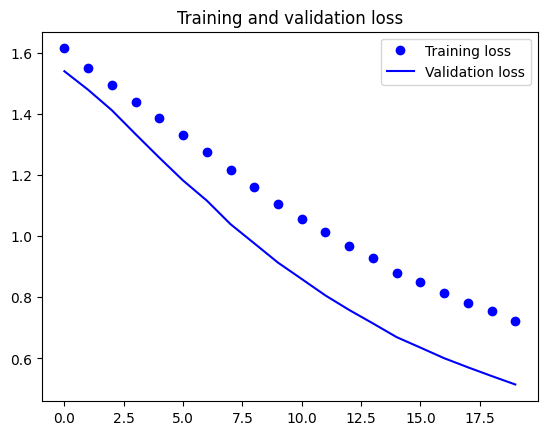

In [23]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = sport_model.predict(test_X)

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [25]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((2437,), (2437,))

# Aprendamos de los errores: Qué mejorar

Found 2208 correct labels


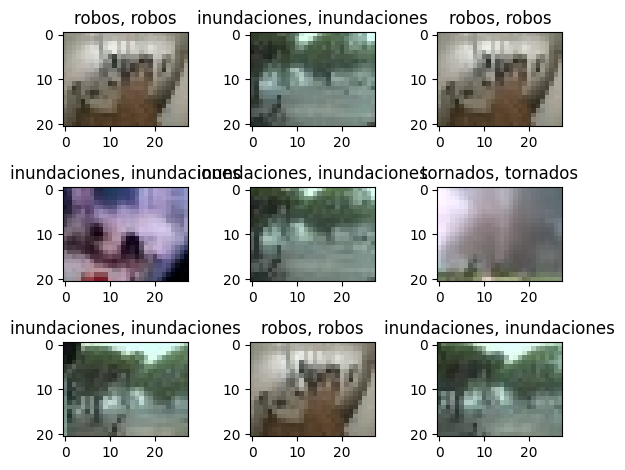

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 229 incorrect labels


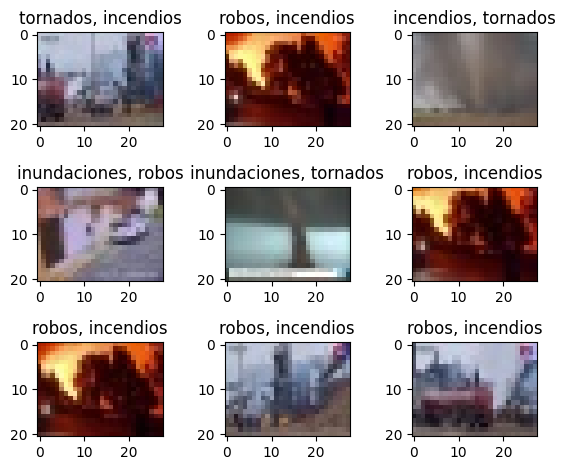

In [28]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [30]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.98       304
     Class 1       0.95      0.76      0.84       456
     Class 2       0.78      0.94      0.85       376
     Class 3       0.90      0.96      0.93       730
     Class 4       0.96      0.89      0.92       571

    accuracy                           0.91      2437
   macro avg       0.91      0.91      0.90      2437
weighted avg       0.91      0.91      0.91      2437



In [41]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['roboimg1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
roboimg1.jpg robos
